In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


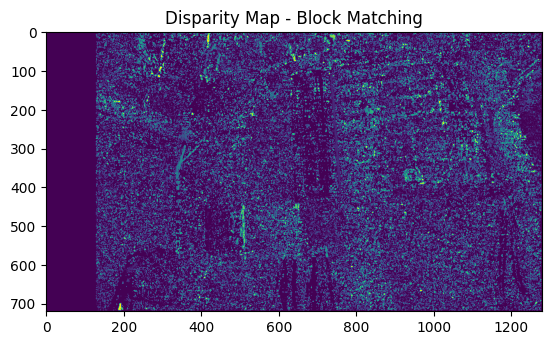

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_left = cv2.imread('/content/drive/MyDrive/zedSplit/right_half_1.png', cv2.IMREAD_GRAYSCALE)
img_right = cv2.imread('/content/drive/MyDrive/zedSplit/left_half_1.png', cv2.IMREAD_GRAYSCALE)

# Set up block matching stereo
block_size = 5  # Size of the block window. Must be odd.
min_disp = 0    # Minimum possible disparity value
num_disp = 128   # Maximum disparity minus minimum disparity

# Create StereoBM object
stereo = cv2.StereoBM_create(numDisparities=num_disp, blockSize=block_size)

# Compute disparity map
disparity = stereo.compute(img_left, img_right)

# Normalize the disparity map for display
disparity = cv2.normalize(disparity, disparity, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
disparity = np.uint8(disparity)

# Display the result
plt.imshow(disparity, cmap='viridis')
plt.title('Disparity Map - Block Matching')
plt.show()

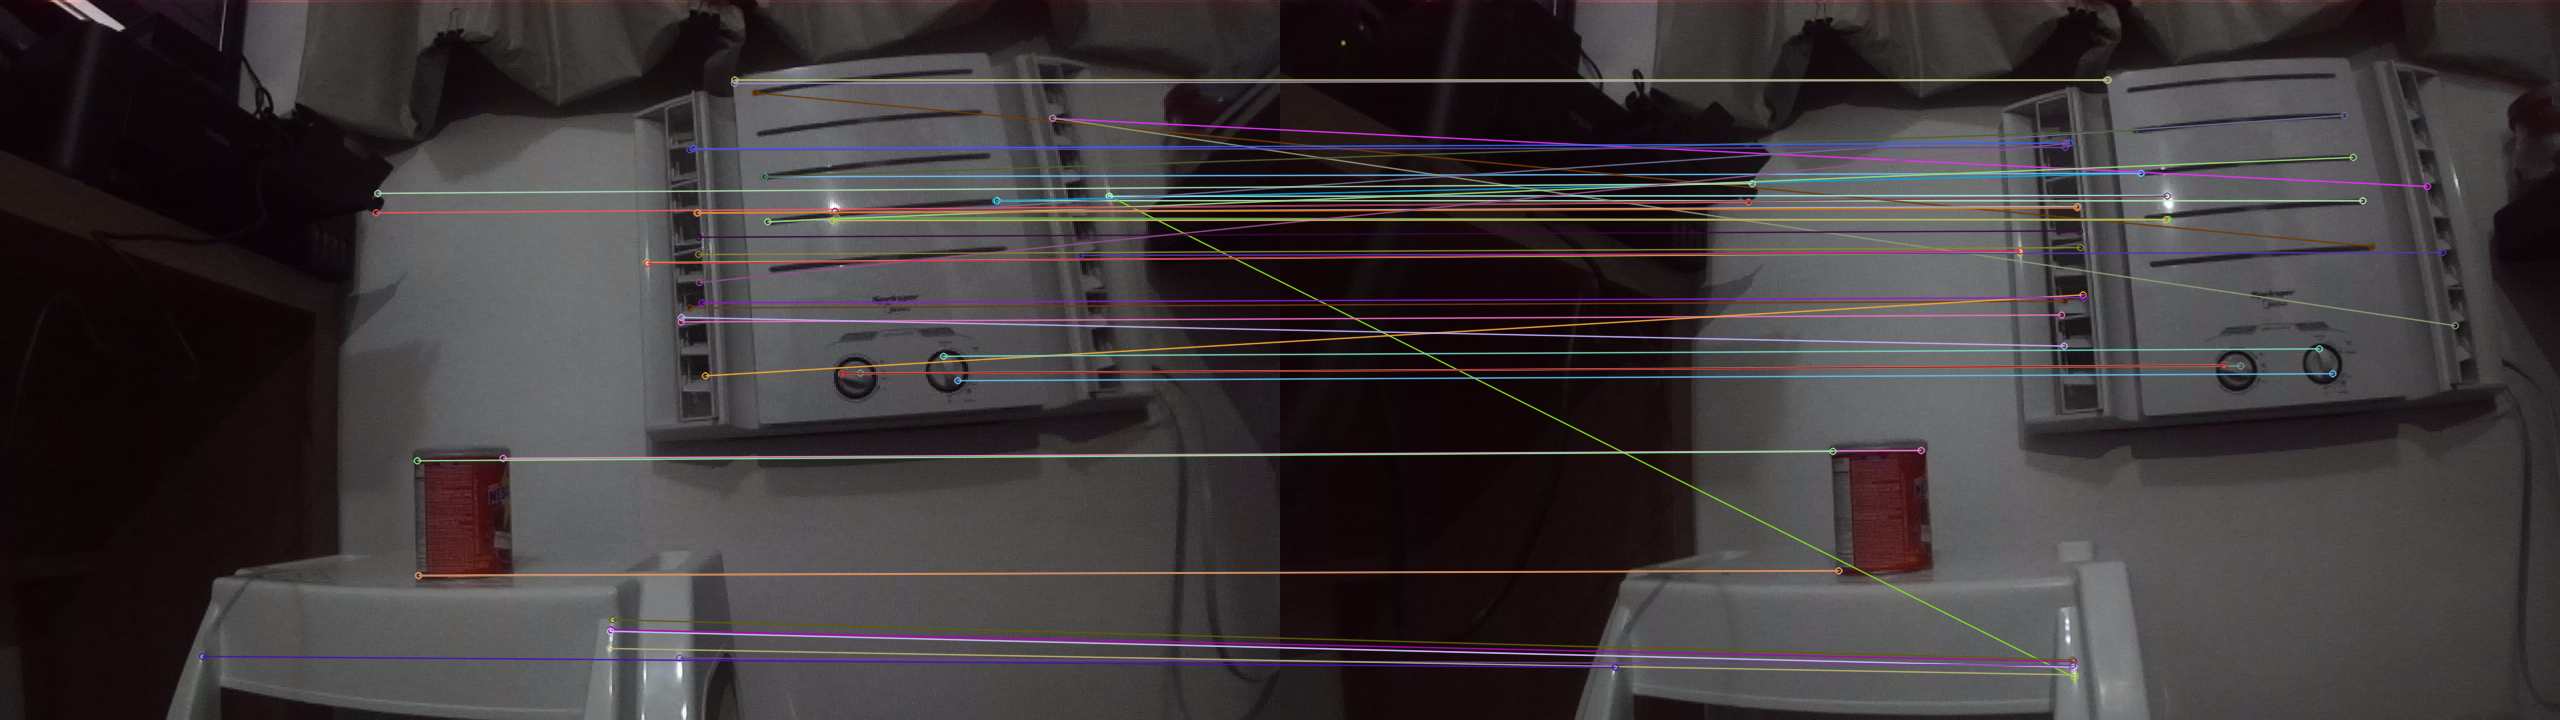

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img_left = cv2.imread('/content/drive/MyDrive/zedSplit/right_half.png')
img_right = cv2.imread('/content/drive/MyDrive/zedSplit/left_half.png')

gray_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2GRAY)
gray_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2GRAY)

# Cria o detector de características ORB (Oriented FAST and Rotated BRIEF)
orb = cv2.ORB_create()

# Detecta pontos-chave e calcula descritores para as duas imagens
keypoints_left, descriptors_left = orb.detectAndCompute(gray_left, None)
keypoints_right, descriptors_right = orb.detectAndCompute(gray_right, None)

# Cria o objeto BFMatcher, que faz a correspondência de descritores usando a norma de Hamming
# crossCheck=True assegura que apenas correspondências bidirecionais sejam consideradas
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Encontra as correspondências entre os descritores das duas imagens
matches = bf.match(descriptors_left, descriptors_right)

# Ordena as correspondências com base na distância (quanto menor, melhor a correspondência)
matches = sorted(matches, key=lambda x: x.distance)

img_matches = cv2.drawMatches(
    img_left, keypoints_left,
    img_right, keypoints_right,
    matches[:50], None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

cv2_imshow(img_matches)

In [ ]:
#dividir imagem ao meio, as do zed vem grudadas e precisam serem separadas

from PIL import Image


image_path = '/content/drive/MyDrive/zed/DepthViewer_SbS_3299_376_10-07-2024-11-32-26.png'
image = Image.open(image_path)


width, height = image.size


left_half = (0, 0, width // 2, height)
right_half = (width // 2, 0, width, height)


left_image = image.crop(left_half)
right_image = image.crop(right_half)

left_image.save('/content/drive/MyDrive/zedSplit/left_half.png')
right_image.save('/content/drive/MyDrive/zedSplit/right_half.png')

print("Image split and saved successfully.")

Image split and saved successfully.
